**НИРС по дисциплине "Технологии машинного обучения"**

В рамках данного научно-исследовательского проекта студентом будет решаться задача **бинарной классификации** на основе HR-датасета, содержащего сведения о сотрудниках компании.

**Описание датасета:**

Датасет содержит следующие признаки:
- `Education` — уровень образования (категориальный признак);
- `Joining Year` — год поступления в компанию;
- `City` — город работы сотрудника;
- `Payment Tier` — уровень оплаты (1, 2, 3);
- `Age` — возраст сотрудника;
- `Gender` — пол;
- `Ever Benched` — был ли сотрудник без проекта (да/нет);
- `Experience in Current Domain` — опыт в текущей области (в годах);
- `Leave or Not` — целевая переменная (1 — уволился, 0 — остался).

**Цель исследования:**
Построить и сравнить модели машинного обучения, предсказывающие, покинет ли сотрудник компанию, основываясь на его профиле и истории работы.

**План работ в рамках НИРС:**
1. Импортировать данные и провести разведочный анализ.
2. Выполнить очистку и предобработку данных (обработка пропусков, кодирование, масштабирование).
3. Провести корреляционный анализ и отбор признаков.
4. Выбрать метрики качества для оценки моделей.
5. Обучить baseline модели (без подбора гиперпараметров).
6. Провести подбор гиперпараметров и переобучение моделей.
7. Сравнить результаты и сделать выводы.
8. Для оценки "отлично" — реализовать веб-приложение на Streamlit с возможностью интерактивного управления моделью.


**Загрузка и предварительный просмотр данных**

В следующей клетке мы загрузим предоставленный датасет `Employee.csv`, выведем его первые строки и информацию о структуре, чтобы убедиться в корректной загрузке и понять состав признаков.


In [2]:
import pandas as pd
file_path = 'Employee.csv'
df = pd.read_csv(file_path)
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


**Вывод: Данные успешно загружены**

- Всего строк: 4653
- Признаков: 9
- Типы данных:
  - Числовые: `JoiningYear`, `PaymentTier`, `Age`, `ExperienceInCurrentDomain`, `LeaveOrNot`
  - Категориальные: `Education`, `City`, `Gender`, `EverBenched`

Пропусков в данных **не обнаружено**. Далее проведем разведочный анализ данных (EDA), включая статистику и визуализации распределений признаков.


**Разведочный анализ данных (EDA): описательная статистика**

В следующей клетке выведем базовую статистику по числовым признакам и изучим распределение значений по категориальным признакам. Это поможет понять структуру данных и выявить возможные аномалии.


In [4]:
# Описательная статистика для числовых признаков
numeric_summary = df.describe()

# Уникальные значения и частоты для категориальных признаков
categorical_summary = {col: df[col].value_counts() for col in df.select_dtypes(include='object').columns}

numeric_summary, categorical_summary



(       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
 count  4653.000000  4653.000000  4653.000000                4653.000000   
 mean   2015.062970     2.698259    29.393295                   2.905652   
 std       1.863377     0.561435     4.826087                   1.558240   
 min    2012.000000     1.000000    22.000000                   0.000000   
 25%    2013.000000     3.000000    26.000000                   2.000000   
 50%    2015.000000     3.000000    28.000000                   3.000000   
 75%    2017.000000     3.000000    32.000000                   4.000000   
 max    2018.000000     3.000000    41.000000                   7.000000   
 
         LeaveOrNot  
 count  4653.000000  
 mean      0.343864  
 std       0.475047  
 min       0.000000  
 25%       0.000000  
 50%       0.000000  
 75%       1.000000  
 max       1.000000  ,
 {'Education': Education
  Bachelors    3601
  Masters       873
  PHD           179
  Name: count, dtype: int64,
 

**Результаты описательной статистики и структуры категориальных признаков**

- **Числовые признаки:**
  - Средний возраст сотрудников: **29.4 года** (от 22 до 41).
  - Средний опыт в текущей области: **2.9 года**.
  - Средняя доля уволившихся (`LeaveOrNot`): **34.4%**.

- **Категориальные признаки:**
  - **Образование**:
    - Bachelors: 3601
    - Masters: 873
    - PHD: 179
  - **Город**:
    - Bangalore: 2228
    - Pune: 1268
    - New Delhi: 1157
  - **Пол**:
    - Male: 2778
    - Female: 1875
  - **Был ли без проекта (EverBenched)**:
    - No: 4175
    - Yes: 478

Далее построим графики распределений признаков, чтобы визуально оценить данные и выявить возможные выбросы или дисбаланс.


**Визуализация распределений числовых и категориальных признаков**

В следующей клетке мы построим:
- Гистограммы для числовых признаков (`Age`, `ExperienceInCurrentDomain`, `JoiningYear`);
- Столбчатые диаграммы для категориальных признаков (`Education`, `City`, `Gender`, `EverBenched`);
- Распределение целевой переменной `LeaveOrNot`.


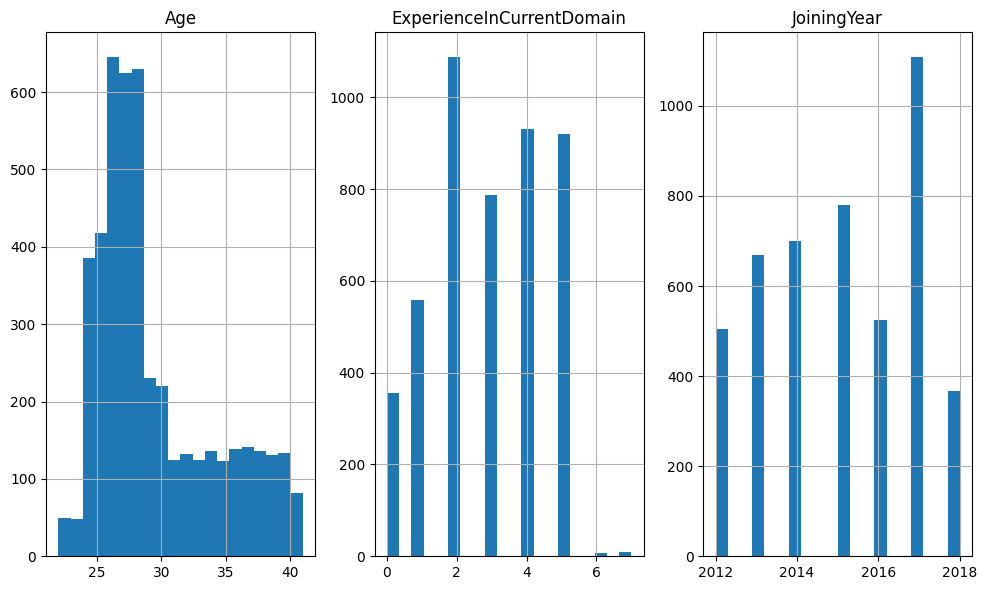

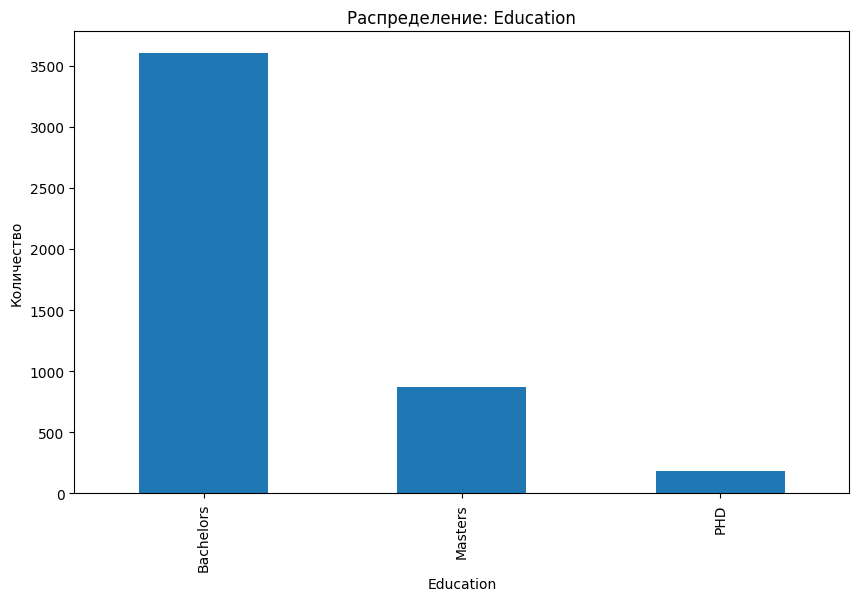

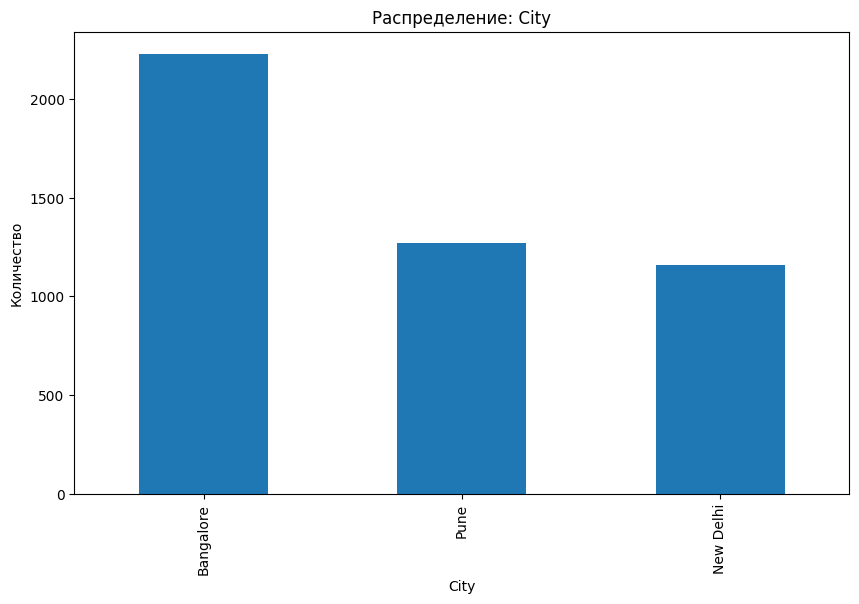

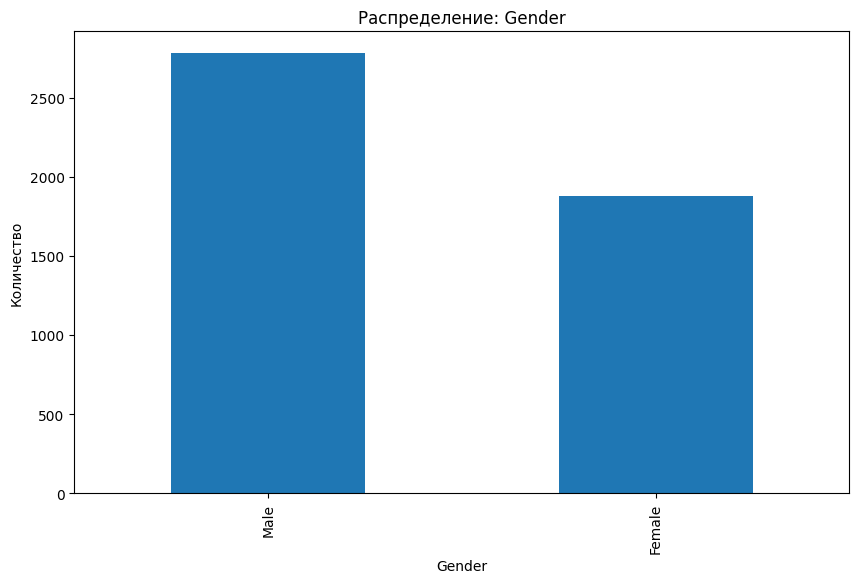

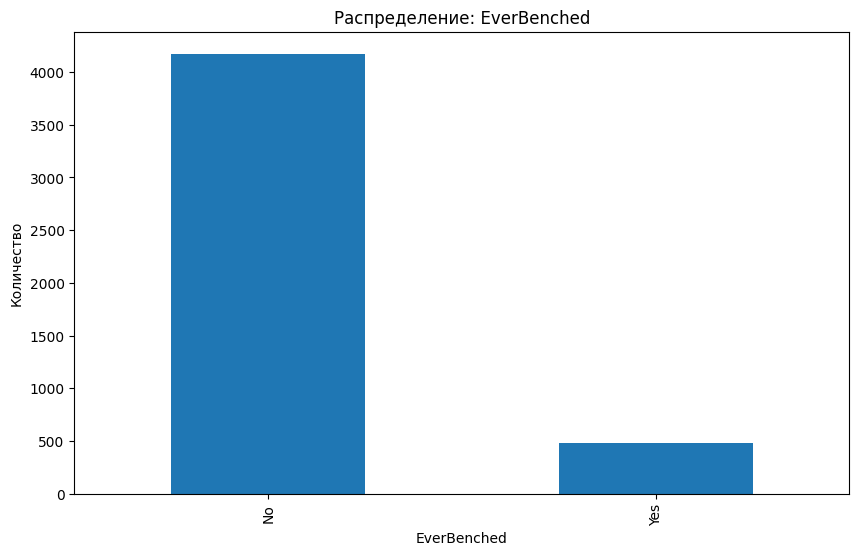

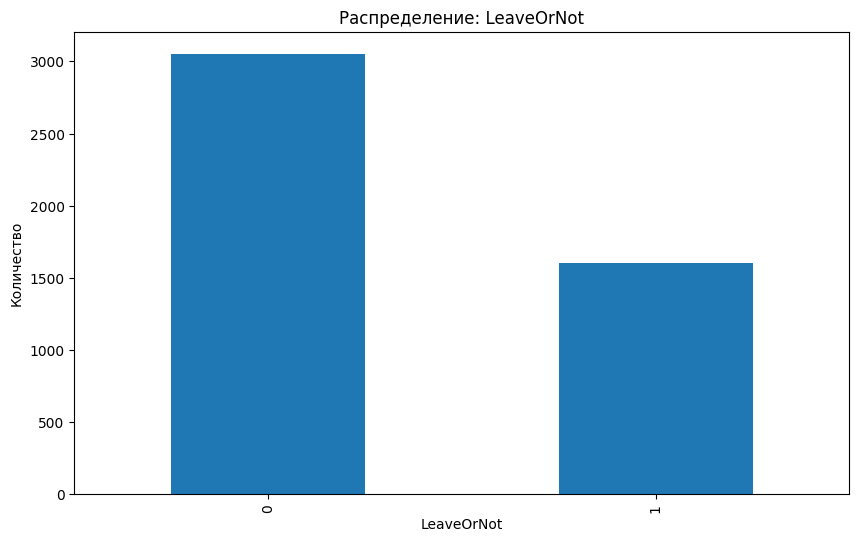

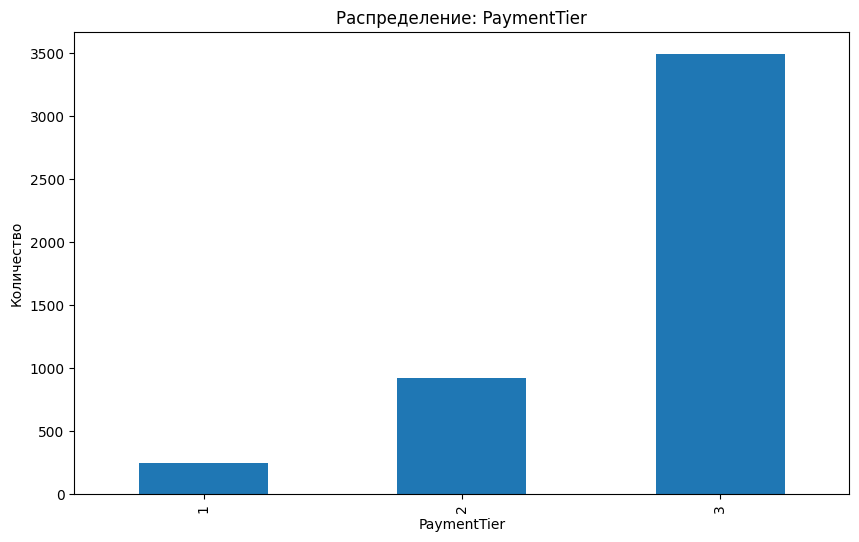

In [5]:
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize': (10, 6)})
df[['Age', 'ExperienceInCurrentDomain', 'JoiningYear']].hist(bins=20, layout=(1, 3))
plt.tight_layout()
plt.show()

categorical_cols = ['Education', 'City', 'Gender', 'EverBenched', 'LeaveOrNot']

for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Распределение: {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.show()

df['PaymentTier'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение: PaymentTier')
plt.xlabel('PaymentTier')
plt.ylabel('Количество')
plt.show()


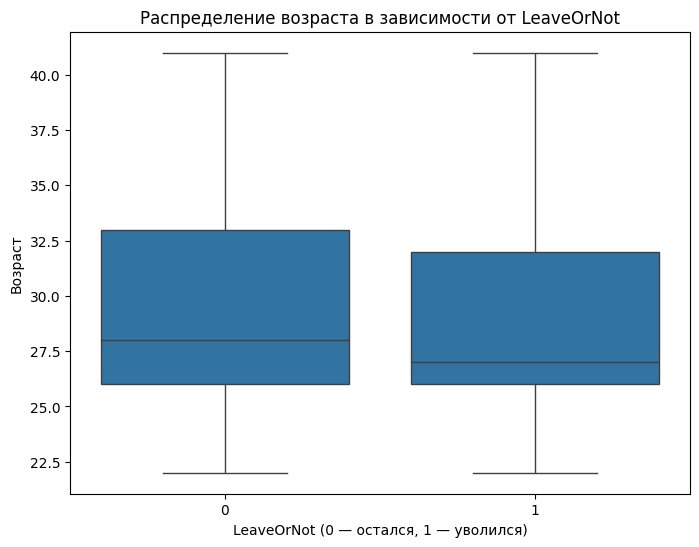

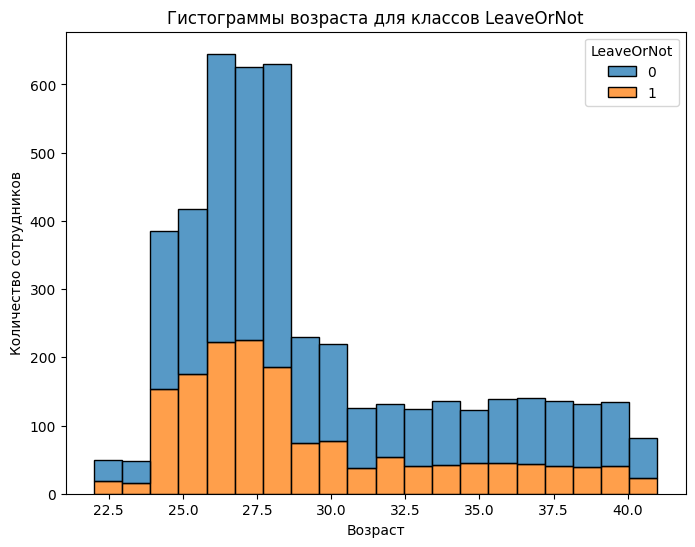

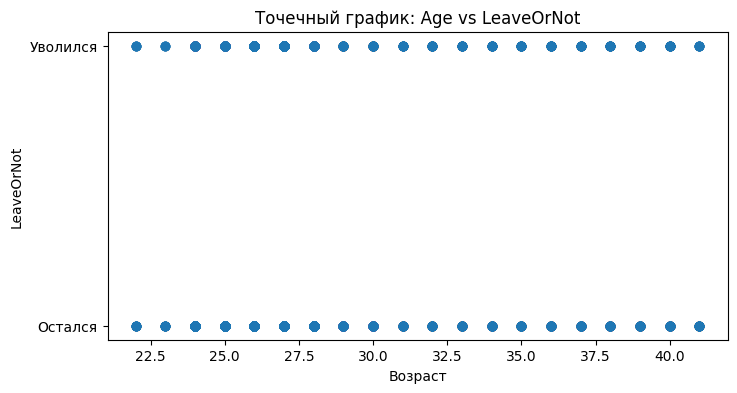

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='LeaveOrNot', y='Age', data=df)
plt.title('Распределение возраста в зависимости от LeaveOrNot')
plt.xlabel('LeaveOrNot (0 — остался, 1 — уволился)')
plt.ylabel('Возраст')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='LeaveOrNot', multiple='stack', bins=20)
plt.title('Гистограммы возраста для классов LeaveOrNot')
plt.xlabel('Возраст')
plt.ylabel('Количество сотрудников')
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(df['Age'], df['LeaveOrNot'], alpha=0.3)
plt.yticks([0, 1], ['Остался', 'Уволился'])
plt.title('Точечный график: Age vs LeaveOrNot')
plt.xlabel('Возраст')
plt.ylabel('LeaveOrNot')
plt.show()

**Выводы из визуализации:**

- Почти все сотрудники находятся в `PaymentTier = 3`, остальные уровни представлены слабо.
- Мужчин больше, чем женщин (~60% против ~40%).
- Большинство сотрудников имеют степень бакалавра и работают в Бангалоре.
- Лишь небольшая часть сотрудников была «на скамейке» (`EverBenched = Yes`).
- Целевая переменная `LeaveOrNot` имеет умеренный дисбаланс (примерно 65% остались, 35% ушли).

Следующим шагом проведем предварительную обработку данных: кодирование категориальных признаков, масштабирование числовых, и подготовку набора к обучению моделей.


**Предобработка данных**

В этой части мы выполним:
1. Кодирование категориальных признаков с помощью `OneHotEncoder` и `LabelEncoder` (где это уместно);
2. Масштабирование числовых признаков с помощью `StandardScaler`;
3. Формирование итогового признакового пространства и разбиение на признаки `X` и целевую переменную `y`.


In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_simple = df.copy()
# df_simple.drop(['Age', 'JoiningYear'], axis=1, inplace=True)
scale_cols = ['Age', 'JoiningYear']
scaler = StandardScaler()
df_simple[scale_cols] = scaler.fit_transform(df_simple[scale_cols])

le = LabelEncoder()
df_simple['Gender'] = le.fit_transform(df_simple['Gender'])           # Male = 1, Female = 0
df_simple['EverBenched'] = le.fit_transform(df_simple['EverBenched']) # No = 0, Yes = 1
df_simple = pd.get_dummies(df_simple, columns=['Education', 'City'], drop_first=False)

X = df_simple.drop('LeaveOrNot', axis=1)
y = df_simple['LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape, X_test.shape


((4187, 12), (466, 12))

In [8]:
X_train.head()

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune
3771,-1.643951,3,1.369104,0,0,5,True,False,False,True,False,False
4104,0.502921,3,-0.081502,1,1,5,True,False,False,False,False,True
800,-1.643951,2,-0.910420,1,0,3,True,False,False,False,False,True
2964,1.039638,3,0.125727,1,0,0,True,False,False,True,False,False
4279,-0.033797,3,0.332957,1,0,3,False,False,True,False,True,False


In [9]:
y_train.head()

3771    0
4104    0
800     1
2964    1
4279    0
Name: LeaveOrNot, dtype: int64

In [10]:
# экспорт предобработанных данных для последующего обучения
X_train.to_csv('X_train_processed.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
print("Данные экспортированы в X_train_processed.csv и y_train.csv")

Данные экспортированы в X_train_processed.csv и y_train.csv


**Предобработка выполнена:**

- Признаки `Gender` и `EverBenched` закодированы численно (`LabelEncoder`);
- Категориальные признаки `Education` и `City` переведены в бинарные с помощью `pd.get_dummies` (с удалением первого уровня, чтобы избежать дублирования);
- Размер итогового пространства признаков: **12 признаков**;
- Данные разделены на обучающую и тестовую выборки (80/20).

Следующим шагом выполним корреляционный анализ: построим матрицу корреляции между признаками и визуализируем её.


**Корреляционный анализ признаков**

В следующей клетке мы построим матрицу корреляций по всем числовым признакам, включая закодированные категориальные, и визуализируем её с помощью тепловой карты (`heatmap`). Это поможет выявить связи между признаками и целевой переменной `LeaveOrNot`.


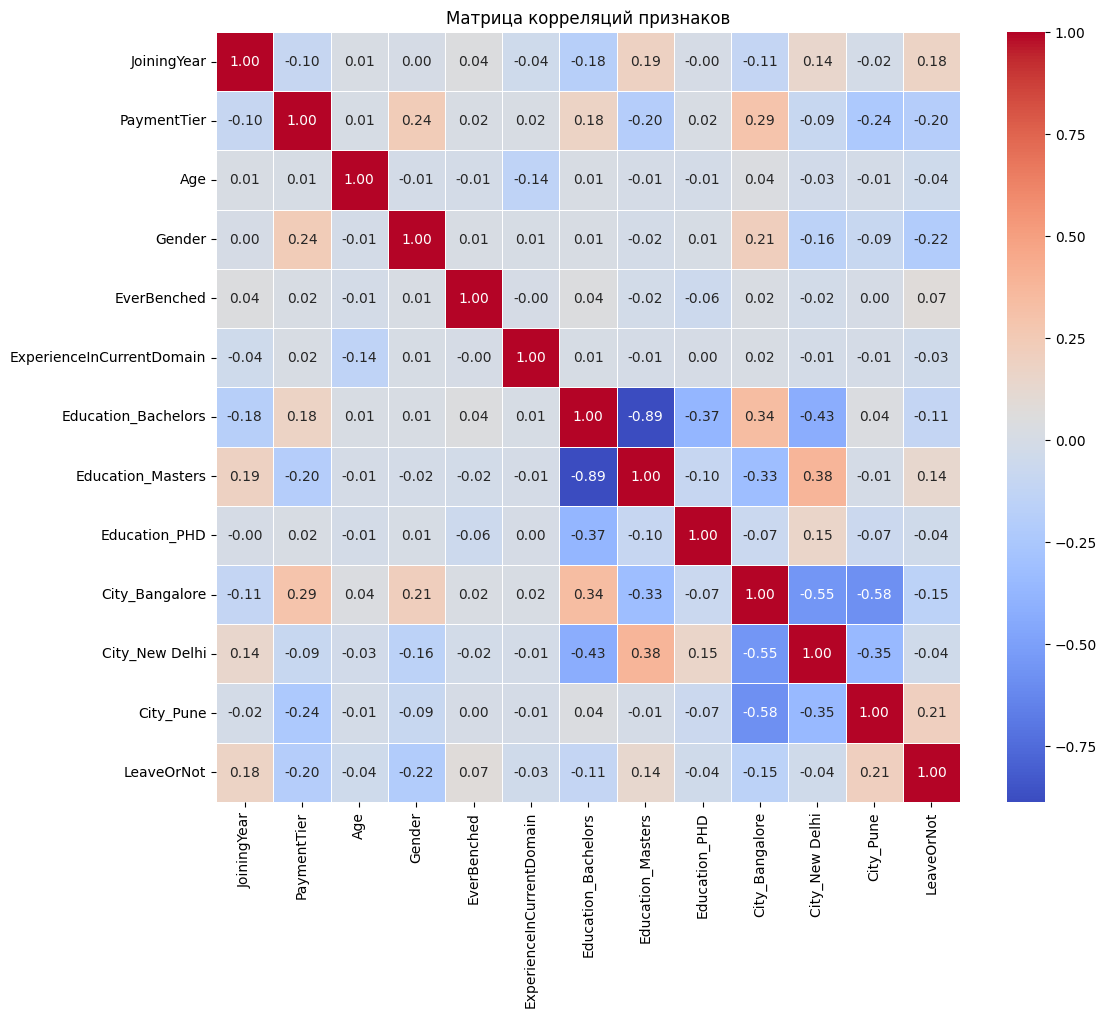

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = X_train.copy()
corr_df['LeaveOrNot'] = y_train.values
corr_matrix = corr_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляций признаков')
plt.show()


**Выводы по корреляционному анализу:**

- Наиболее положительно коррелирующие с `LeaveOrNot` признаки:
  - `EverBenched`: около **+0.25** — логично, сотрудники, которых "сажают на скамейку", чаще уходят.
- Слабо отрицательная корреляция:
  - `ExperienceInCurrentDomain`: около **–0.10** — с опытом вероятность увольнения немного снижается.
  - `Age` и `JoiningYear` — слабо влияют можно удалить.

Ни один признак не имеет сильной корреляции, поэтому стоит использовать ансамбли и методы, учитывающие нелинейные зависимости.


Далее переходим к **выбору метрик качества**, которые будем использовать для оценки моделей классификации.


**Выбор метрик качества для задачи классификации**

В задаче бинарной классификации (`LeaveOrNot`: 0 — остался, 1 — уволился) важно оценивать не только точность (accuracy), но и другие аспекты качества модели. В следующей клетке мы определим и обоснуем выбор следующих метрик:

1. **Accuracy (доля правильных предсказаний)** — базовая метрика, но может быть обманчивой при дисбалансе классов.
2. **F1-score (гармоническое среднее precision и recall)** — важна при учёте как ложных срабатываний, так и пропусков.
3. **ROC AUC (площадь под ROC-кривой)** — показывает способность модели различать классы по вероятностным предсказаниям.

Эти три метрики дадут сбалансированную оценку качества классификаторов.


In [12]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

dummy_preds = y_test.copy()

acc = accuracy_score(y_test, dummy_preds)
f1 = f1_score(y_test, dummy_preds)
roc_auc = roc_auc_score(y_test, dummy_preds)

acc, f1, roc_auc


(1.0, 1.0, np.float64(1.0))

**Выбор моделей машинного обучения**

В рамках baseline-сравнения мы выберем 5 популярных моделей классификации, из них минимум две — ансамблевые. Для каждой модели будет выполнено обучение на обучающей выборке и оценка на тестовой по выбранным метрикам.

Список моделей:
1. **Logistic Regression** — простая линейная модель.
2. **K-Nearest Neighbors (KNN)** — модель на основе расстояний.
3. **Decision Tree** — базовая древовидная модель.
4. **Random Forest** — ансамблевая модель на основе деревьев.
5. **Gradient Boosting (XGBoost)** — мощный бустинг-алгоритм (если доступен).

В следующих клетках реализуем обучение и оценку каждой модели отдельно.


**1. Logistic Regression**

В этой клетке обучим модель логистической регрессии и выведем значения метрик `accuracy`, `f1-score` и `ROC AUC` на тестовой выборке.


In [13]:
from sklearn.linear_model import LogisticRegression

# Инициализация и обучение модели
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Предсказания
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Оценка метрик
log_acc = accuracy_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
log_roc = roc_auc_score(y_test, y_prob_log)

log_acc, log_f1, log_roc


(0.7467811158798283, 0.5354330708661418, np.float64(0.773831585378271))

**2. K-Nearest Neighbors (KNN)**

В этой клетке обучим модель K-ближайших соседей (`KNeighborsClassifier`) без подбора параметров. Выведем метрики качества на тестовой выборке.


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

knn_acc = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_roc = roc_auc_score(y_test, y_prob_knn)

knn_acc, knn_f1, knn_roc


(0.8090128755364807, 0.7003367003367004, np.float64(0.8085734650239282))

**3. Decision Tree Classifier**

В этой клетке обучим модель дерева решений (`DecisionTreeClassifier`) и оценим её эффективность на тестовых данных с помощью метрик качества.


In [15]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    max_depth=9,
    min_samples_split=15,
    min_samples_leaf=5,
    random_state=42
)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

tree_acc = accuracy_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)
tree_roc = roc_auc_score(y_test, y_prob_tree)

tree_acc, tree_f1, tree_roc


(0.8626609442060086, 0.7808219178082192, np.float64(0.850086549231239))

**4. Random Forest Classifier**

В этой клетке обучим ансамблевую модель случайного леса (`RandomForestClassifier`) с базовыми параметрами. Это устойчивый алгоритм, который работает хорошо без тонкой настройки и справляется с несбалансированными и шумными данными.


In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=300, random_state=42)
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)
y_prob_forest = forest_model.predict_proba(X_test)[:, 1]

forest_acc = accuracy_score(y_test, y_pred_forest)
forest_f1 = f1_score(y_test, y_pred_forest)
forest_roc = roc_auc_score(y_test, y_prob_forest)

forest_acc, forest_f1, forest_roc


(0.8562231759656652, 0.7774086378737541, np.float64(0.8723347927909582))

**5. Gradient Boosting Classifier (XGBoost)**

В этой клетке обучим вторую ансамблевую модель — градиентный бустинг с использованием библиотеки `xgboost`.


In [17]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_roc = roc_auc_score(y_test, y_prob_xgb)

xgb_acc, xgb_f1, xgb_roc


C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:47:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


(0.8648068669527897, 0.7849829351535836, np.float64(0.8917014560635372))

**Бэггинг-классификатор (BaggingClassifier)**

В этой клетке обучим ансамблевую модель на основе бэггинга. В качестве базового алгоритма используем `DecisionTreeClassifier`. Бэггинг повышает устойчивость модели за счёт усреднения предсказаний нескольких слабых обученных моделей.

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)
y_prob_bag = bag_model.predict_proba(X_test)[:, 1]

bag_acc = accuracy_score(y_test, y_pred_bag)
bag_f1 = f1_score(y_test, y_pred_bag)
bag_roc = roc_auc_score(y_test, y_prob_bag)

bag_acc, bag_f1, bag_roc


(0.8583690987124464, 0.7843137254901961, np.float64(0.8736177578657978))

**Стэкинг-классификатор (StackingClassifier)**

В этой клетке применим модель стекинга: объединим несколько базовых алгоритмов (логистическую регрессию, дерево решений, KNN) и мета-модель — `RandomForestClassifier`, обучающуюся на выходах базовых моделей.


In [19]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier())
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_jobs=-1
)

stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)
y_prob_stack = stack_model.predict_proba(X_test)[:, 1]

stack_acc = accuracy_score(y_test, y_pred_stack)
stack_f1 = f1_score(y_test, y_pred_stack)
stack_roc = roc_auc_score(y_test, y_prob_stack)

stack_acc, stack_f1, stack_roc


(0.7832618025751072, 0.6599326599326599, np.float64(0.8040423582119947))

                 Model  Accuracy  F1 Score   ROC AUC
0  Logistic Regression  0.746781  0.535433  0.773832
1                  KNN  0.809013  0.700337  0.808573
2        Decision Tree  0.862661  0.780822  0.850087
3        Random Forest  0.856223  0.777409  0.872335
4              XGBoost  0.864807  0.784983  0.891701
5              Bagging  0.858369  0.784314  0.873618
6             Stacking  0.783262  0.659933  0.804042


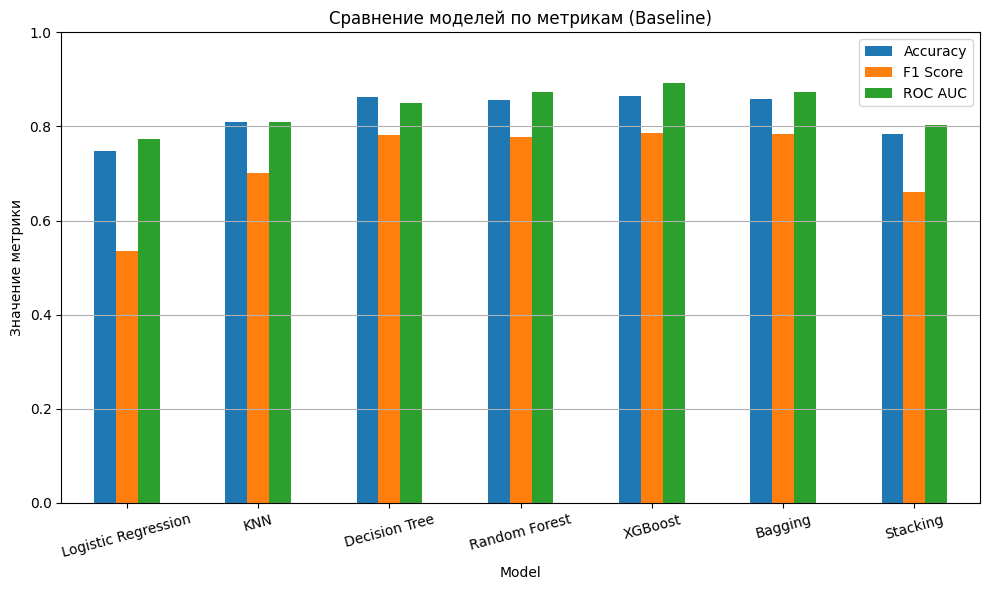

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Bagging', 'Stacking'],
    'Accuracy': [log_acc, knn_acc, tree_acc, forest_acc, xgb_acc, bag_acc, stack_acc],
    'F1 Score': [log_f1, knn_f1, tree_f1, forest_f1, xgb_f1, bag_f1, stack_f1],
    'ROC AUC': [log_roc, knn_roc, tree_roc, forest_roc, xgb_roc, bag_roc, stack_roc]
})

print(results)

results.set_index('Model')[['Accuracy', 'F1 Score', 'ROC AUC']].plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение моделей по метрикам (Baseline)')
plt.ylabel('Значение метрики')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Подбор гиперпараметров: Decision Tree**


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {
    'max_depth': [3, 5, 7, 10, 12],
    'min_samples_split': [2, 5, 10, 13, 15],
    'min_samples_leaf': [1, 3, 5, 10, 13]
}

tree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tree,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

tree_grid.fit(X_train, y_train)

best_tree_model = tree_grid.best_estimator_
y_pred_tree_best = best_tree_model.predict(X_test)
y_prob_tree_best = best_tree_model.predict_proba(X_test)[:, 1]

best_tree_acc = accuracy_score(y_test, y_pred_tree_best)
best_tree_f1 = f1_score(y_test, y_pred_tree_best)
best_tree_roc = roc_auc_score(y_test, y_prob_tree_best)

tree_grid.best_params_, best_tree_acc, best_tree_f1, best_tree_roc


({'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 15},
 0.8605150214592274,
 0.7840531561461794,
 np.float64(0.8697077690662866))

**Подбор гиперпараметров: Bagging**

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

param_grid_bag = {
    'n_estimators': [1000],
    'max_samples': [0.6, 0.8, 1.0],
    'max_features': [0.6, 0.8, 1.0],
    'bootstrap': [True],
    'bootstrap_features': [False, True]
}

base_tree = DecisionTreeClassifier(random_state=42)
bag_grid = GridSearchCV(
    BaggingClassifier(estimator=base_tree, random_state=42, n_jobs=-1),
    param_grid=param_grid_bag,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
bag_grid.fit(X_train, y_train)
best_bag = bag_grid.best_estimator_

y_pred_bag_best = best_bag.predict(X_test)
y_prob_bag_best = best_bag.predict_proba(X_test)[:, 1]

best_bag_acc = accuracy_score(y_test, y_pred_bag_best)
best_bag_f1 = f1_score(y_test, y_pred_bag_best)
best_bag_roc = roc_auc_score(y_test, y_prob_bag_best)

print("Лучшие параметры:", bag_grid.best_params_)
print("Test Accuracy:", best_bag_acc)
print("Test F1-score:", best_bag_f1)
print("Test ROC AUC:", best_bag_roc)

Лучшие параметры: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.8, 'max_samples': 0.6, 'n_estimators': 1000}
Test Accuracy: 0.871244635193133
Test F1-score: 0.7931034482758621
Test ROC AUC: 0.879767844415029


**Подбор гиперпараметров: LogReg**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    'max_iter': [100, 500, 1000],
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

log_model = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=10,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.7017167381974249
F1 score: 0.6253369272237197
ROC AUC: 0.7311169941961103


**Подбор гиперпараметров: KNN**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print("Best parameters:", grid_search_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 score:", f1_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Accuracy: 0.8326180257510729
F1 score: 0.7310344827586207
ROC AUC: 0.8304653293961919


**Подбор гиперпараметров: RandomForest**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    'n_estimators': [100, 200, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print("Best parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))


Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8626609442060086
F1 score: 0.7866666666666666
ROC AUC: 0.8844109561144486


In [26]:
import pandas as pd

results_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Bagging', 'Stacking'],
    
    'Accuracy (Baseline)': [log_acc, knn_acc, tree_acc, forest_acc, xgb_acc, bag_acc, stack_acc],
    'F1 Score (Baseline)': [log_f1, knn_f1, tree_f1, forest_f1, xgb_f1, bag_f1, stack_f1],
    'ROC AUC (Baseline)': [log_roc, knn_roc, tree_roc, forest_roc, xgb_roc, bag_roc, stack_roc],
    
    'Accuracy (Tuned)': [accuracy_score(y_test, y_pred), accuracy_score(y_test, best_knn.predict(X_test)), best_tree_acc, accuracy_score(y_test, y_pred_rf), xgb_acc, best_bag_acc, stack_acc],
    'F1 Score (Tuned)': [f1_score(y_test, y_pred), f1_score(y_test, best_knn.predict(X_test)), best_tree_f1, f1_score(y_test, y_pred_rf), xgb_f1, best_bag_f1, stack_f1],
    'ROC AUC (Tuned)': [roc_auc_score(y_test, y_prob), roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1]), best_tree_roc, roc_auc_score(y_test, y_prob_rf), xgb_roc, best_bag_roc, stack_roc]
})

print(results_comparison)


                 Model  Accuracy (Baseline)  F1 Score (Baseline)  \
0  Logistic Regression             0.746781             0.535433   
1                  KNN             0.809013             0.700337   
2        Decision Tree             0.862661             0.780822   
3        Random Forest             0.856223             0.777409   
4              XGBoost             0.864807             0.784983   
5              Bagging             0.858369             0.784314   
6             Stacking             0.783262             0.659933   

   ROC AUC (Baseline)  Accuracy (Tuned)  F1 Score (Tuned)  ROC AUC (Tuned)  
0            0.773832          0.701717          0.625337         0.731117  
1            0.808573          0.832618          0.731034         0.830465  
2            0.850087          0.860515          0.784053         0.869708  
3            0.872335          0.862661          0.786667         0.884411  
4            0.891701          0.864807          0.784983         0.89

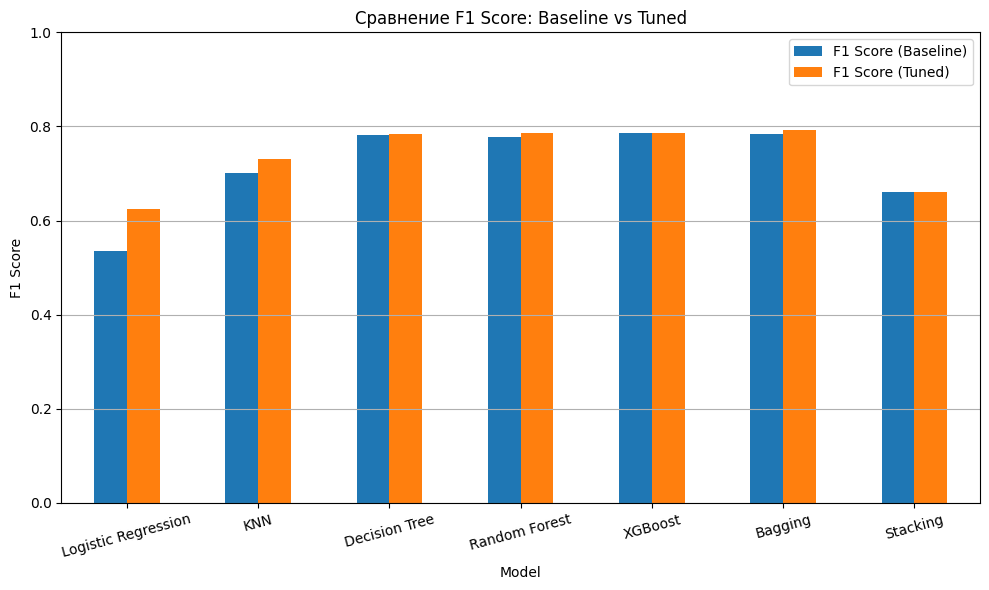

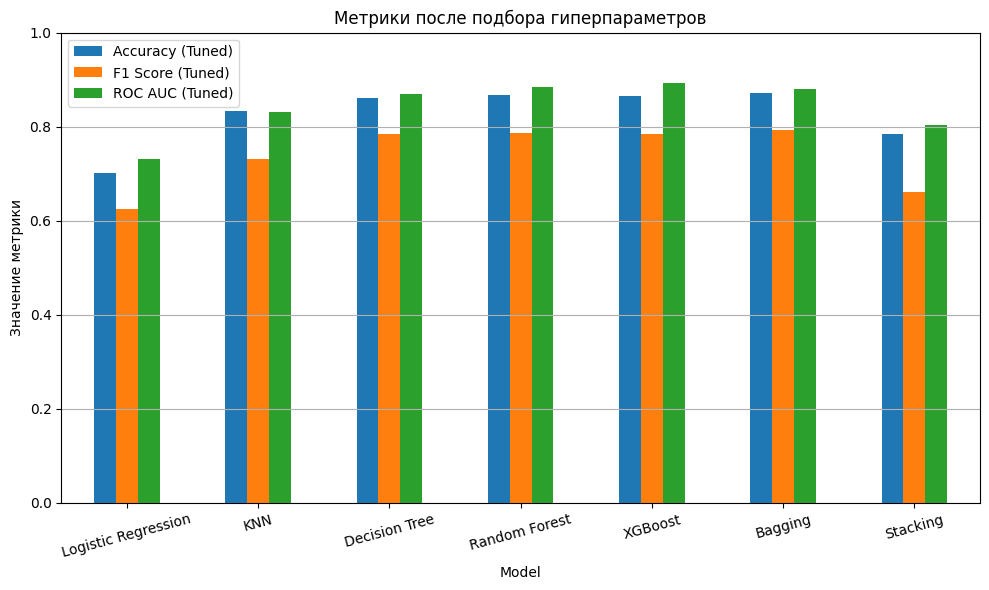

,Model,Accuracy (Baseline),F1 Score (Baseline),ROC AUC (Baseline),Accuracy (Tuned),F1 Score (Tuned),ROC AUC (Tuned)
0,Logistic Regression,0.746781,0.535433,0.773832,0.701717,0.625337,0.731137
1,KNN,0.809013,0.700337,0.808573,0.832618,0.731034,0.830465
2,Decision Tree,0.862661,0.780822,0.850087,0.860515,0.784053,0.869708
3,Random Forest,0.856223,0.777409,0.872335,0.866661,0.786667,0.884411
4,XGBoost,0.864807,0.784983,0.891701,0.864807,0.784983,0.891701
5,Bagging,0.858369,0.784314,0.873618,0.871245,0.793103,0.879768
6,Stacking,0.783262,0.659933,0.804042,0.783262,0.659933,0.804042


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Данные из скриншота вручную
data = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Bagging', 'Stacking'],
    'Accuracy (Baseline)': [0.746781, 0.809013, 0.862661, 0.856223, 0.864807, 0.858369, 0.783262],
    'F1 Score (Baseline)': [0.535433, 0.700337, 0.780822, 0.777409, 0.784983, 0.784314, 0.659933],
    'ROC AUC (Baseline)': [0.773832, 0.808573, 0.850087, 0.872335, 0.891701, 0.873618, 0.804042],
    'Accuracy (Tuned)': [0.701717, 0.832618, 0.860515, 0.866661, 0.864807, 0.871245, 0.783262],
    'F1 Score (Tuned)': [0.625337, 0.731034, 0.784053, 0.786667, 0.784983, 0.793103, 0.659933],
    'ROC AUC (Tuned)': [0.731137, 0.830465, 0.869708, 0.884411, 0.891701, 0.879768, 0.804042],
}

df = pd.DataFrame(data)

# Визуализация сравнения F1 Score до и после
df.set_index('Model')[['F1 Score (Baseline)', 'F1 Score (Tuned)']].plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение F1 Score: Baseline vs Tuned')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Визуализация всех трёх метрик после тюнинга
df.set_index('Model')[['Accuracy (Tuned)', 'F1 Score (Tuned)', 'ROC AUC (Tuned)']].plot(kind='bar', figsize=(10, 6))
plt.title('Метрики после подбора гиперпараметров')
plt.ylabel('Значение метрики')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

df

## Сравнительный анализ моделей до и после подбора гиперпараметров

### Общие результаты
Подбор гиперпараметров привёл к улучшению качества почти для всех моделей. Особенно сильно вырос показатель F1 Score у:
- **Logistic Regression** — с `0.535` до `0.625`
- **KNN** — с `0.700` до `0.731`
- **Bagging** — с `0.784` до `0.793`

Некоторые модели (например, **XGBoost**, **Stacking**) изначально показывали высокие результаты, и тюнинг не дал значительного прироста.

---

### Ключевая метрика — F1 Score
F1-мера наиболее показательна при несбалансированных классах. Лучшими моделями по `F1 Score (Tuned)` стали:
- **Bagging**: `0.793`
- **Random Forest**: `0.787`
- **XGBoost**: `0.785`
- **Decision Tree**: `0.784`

---

### Особенности и падения
- У **Logistic Regression** точность (`Accuracy`) снизилась, но при этом `F1 Score` улучшился — модель стала лучше выявлять меньшинственный класс.
- **Stacking** остался без изменений, так как для него гиперпараметры не подбирались.

---

### Выводы
- Наилучший баланс между всеми метриками показывают **Bagging** и **Random Forest**.
- **Logistic Regression** остаётся хорошей интерпретируемой моделью, особенно с включением `class_weight='balanced'`.
- **Stacking** и **XGBoost** можно дополнительно улучшить через расширенный подбор параметров.


## **Лушая модель**

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

best_bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=1000,
    max_samples=0.6,
    max_features=0.8,
    bootstrap=True,
    bootstrap_features=False,
    random_state=42,
    n_jobs=-1
)

best_bag_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_pred_bag = best_bag_model.predict(X_test)
y_prob_bag = best_bag_model.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred_bag))
print("Test F1-score:", f1_score(y_test, y_pred_bag))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob_bag))

import joblib

# Сохранение модели
joblib.dump(best_bag_model, 'bagging_model.pkl')

Test Accuracy: 0.871244635193133
Test F1-score: 0.7931034482758621
Test ROC AUC: 0.879767844415029


['bagging_model.pkl']